<a href="https://colab.research.google.com/github/victoralves87/analiseDados-colab/blob/main/ETL(Netflix_Filmes).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [9]:
df = pd.read_csv('/content/netflix_movies_detailed_up_to_2025.csv')

df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,language,description,popularity,vote_count,vote_average,budget,revenue
0,10192,Movie,Shrek Forever After,Mike Mitchell,"Mike Myers, Eddie Murphy, Cameron Diaz, Antoni...",United States of America,2010-05-16,2010,6.380,NaN,"Comedy, Adventure, Fantasy, Animation, Family",en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.380,165000000,752600867
1,27205,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W...","United Kingdom, United States of America",2010-07-15,2010,8.369,NaN,"Action, Science Fiction, Adventure",en,"Cobb, a skilled thief who commits corporate es...",156.242,37119,8.369,160000000,839030630
2,12444,Movie,Harry Potter and the Deathly Hallows: Part 1,David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, T...","United Kingdom, United States of America",2010-11-17,2010,7.744,NaN,"Adventure, Fantasy",en,"Harry, Ron and Hermione walk away from their l...",121.191,19327,7.744,250000000,954305868


In [5]:
#mostraando quantos valores nulos tem minhas colunas (duration está totalmente nula)
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,132
cast,204
country,466
date_added,0
release_year,0
rating,0
duration,16000


In [11]:
#visualizando minhas colunas irei renomear na próxima célula
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres', 'language',
       'description', 'popularity', 'vote_count', 'vote_average', 'budget',
       'revenue'],
      dtype='object')

In [12]:
df.rename(columns={
    'show_id': 'id',
    'type': 'tipo',
    'title': 'titulo',
    'director': 'diretor',
    'cast': 'elenco',
    'country': 'pais',
    'date_added': 'data_adicionado',
    'release_year': 'ano_lancamento',
    'rating': 'classificacao',
    'duration': 'duracao',
    'genres': 'generos',
    'language': 'idioma',
    'description': 'descricao',
    'popularity': 'popularidade',
    'vote_count': 'numero_votos',
    'vote_average': 'media_votos',
    'budget': 'orcamento',
    'revenue': 'receita'
})

In [15]:
#tratando os valores nulos
df['diretor'].fillna('Desconhecido', inplace=True)
df['elenco'].fillna('Desconhecido', inplace=True)
df['pais'].fillna('não informado', inplace=True)
df['generos'].fillna('Não informado', inplace=True)
df['descricao'].fillna('Sem descrição', inplace=True)

<ipython-input-15-590db9579d02>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['diretor'].fillna('Desconhecido', inplace=True)
<ipython-input-15-590db9579d02>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [18]:
#dropei coluna duração pois todos os valores eram nulos
df.drop(columns=['duracao'], inplace=True)


In [19]:
#um resumo estatístico dos dados numéricos
df.describe()

,id,ano_lancamento,classificacao,popularidade,numero_votos,media_votos,orcamento,receita
count,1.600000e+04,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,1.600000e+04,1.600000e+04
mean,5.266582e+05,2017.500000,5.956368,20.384728,718.656125,5.956368,8.766792e+06,2.446308e+07
std,3.794427e+05,4.609916,1.754741,68.610033,2080.198316,1.754741,2.912450e+07,1.116977e+08
min,1.890000e+02,2010.000000,0.000000,3.860000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,2.257258e+05,2013.750000,5.600000,7.840750,53.000000,5.600000,0.000000e+00,0.000000e+00
50%,4.468170e+05,2017.500000,6.300000,10.913500,138.000000,6.300000,0.000000e+00,0.000000e+00
75%,7.739808e+05,2021.250000,6.923000,17.336500,422.000000,6.923000,2.200000e+06,1.654473e+06
max,1.440471e+06,2025.000000,10.000000,3876.006000,37119.000000,10.000000,4.600000e+08,2.799439e+09


In [28]:
# Ordena o DataFrame por orçamento (em ordem decrescente)
top_budget_movies = df[['titulo', 'classificacao', 'orcamento']].sort_values(by='orcamento', ascending=False).head(10)

print("\nTop 10 Filmes com maior orçamento:")
print(top_budget_movies)



Top 10 Filmes com maior orçamento:
                                            titulo  classificacao  orcamento
12006                     Avatar: The Way of Water          7.608  460000000
9006              Star Wars: The Rise of Skywalker          6.300  416000000
15078                         Avatar: Fire and Ash          0.000  400000000
15044    Mission: Impossible - The Final Reckoning          0.000  400000000
13093            Ant-Man and the Wasp: Quantumania          6.297  388369742
1001   Pirates of the Caribbean: On Stranger Tides          6.556  379000000
5006                       Avengers: Age of Ultron          7.272  365000000
9001                             Avengers: Endgame          8.200  356000000
13003                                       Fast X          7.100  340000000
15066                           The Electric State          7.000  320000000


In [29]:
# Calcula a correlação entre 'orcamento' e 'classificacao'
correlation = df['orcamento'].corr(df['classificacao'])

print("\nCorrelação entre orçamento e rating:", correlation)



Correlação entre orçamento e rating: 0.0969670350369676


## filmes com orçamentos maiores não necessariamente têm avaliações melhores.

## **ANÁLISES POR GRAFICOS E INSIGHTS 📈 **

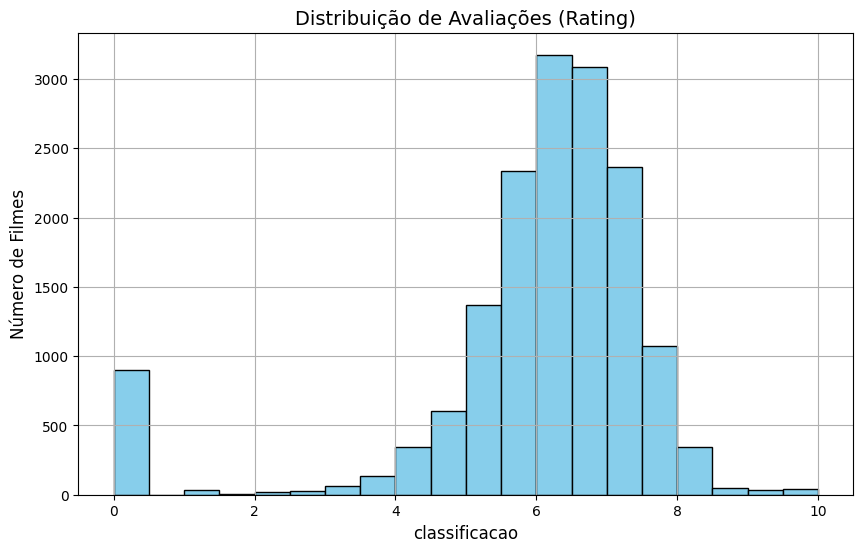

In [30]:
import matplotlib.pyplot as plt

# Plotando o histograma da coluna 'rating'
plt.figure(figsize=(10, 6))
plt.hist(df['classificacao'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição de Avaliações (Rating)', fontsize=14)
plt.xlabel('classificacao', fontsize=12)
plt.ylabel('Número de Filmes', fontsize=12)
plt.grid(True)
plt.show()


### **A maioria dos filmes tem avaliações boas a moderadas, com a maior concentração entre 6 e 7.**

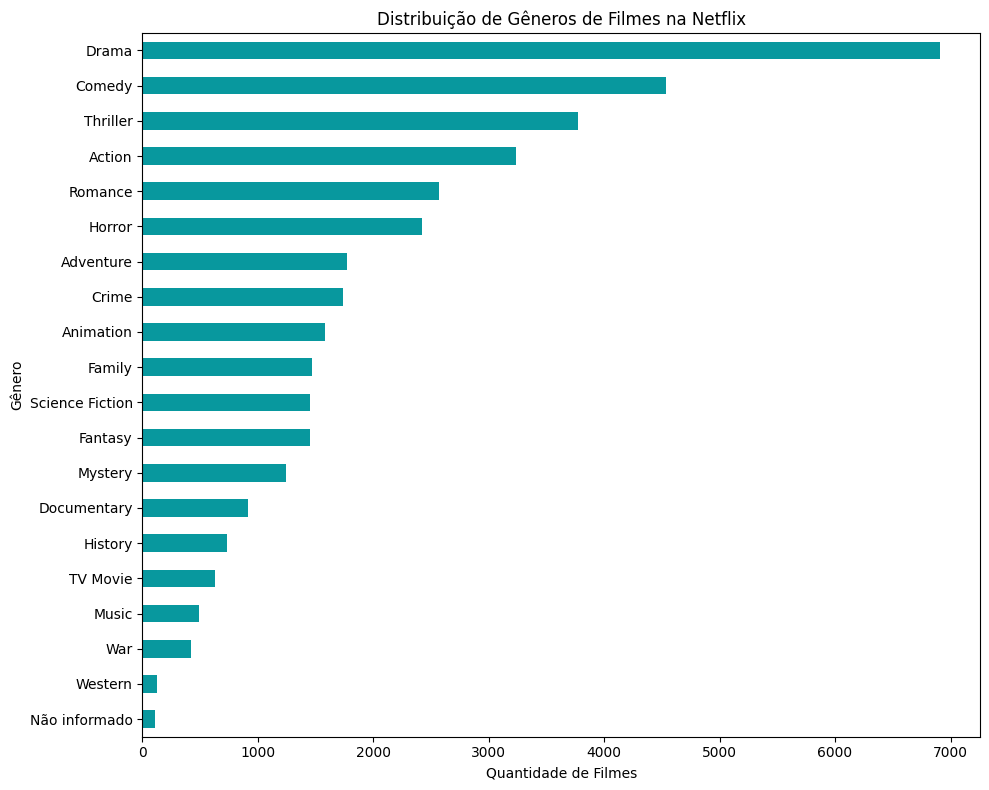

In [35]:

generos_list = []

for linha in df['generos']:
    separados = linha.split(', ')  # separa os gêneros por vírgula
    for genero in separados:
        generos_list.append(genero)

# Contar os gêneros
contagem_generos = pd.Series(generos_list).value_counts().sort_values(ascending=True)

# Plotar
plt.figure(figsize=(10, 8))
contagem_generos.plot(kind='barh', color='#08989e')
plt.title('Distribuição de Gêneros de Filmes na Netflix')
plt.xlabel('Quantidade de Filmes')
plt.ylabel('Gênero')
plt.tight_layout()
plt.show()

## ***A maioria dos filmes da netflix foram do gênero DRAMA***

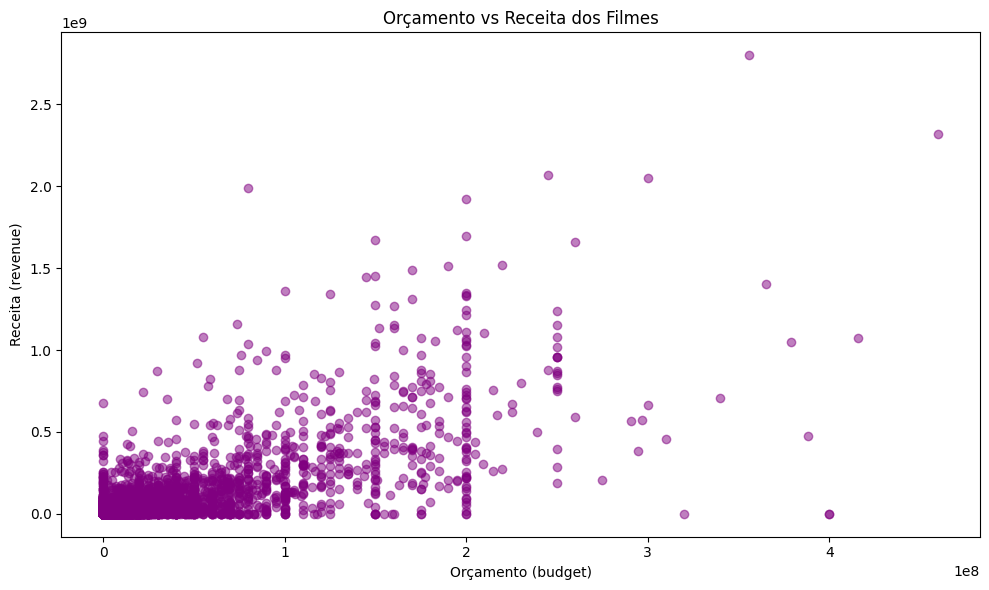

In [36]:


# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(df['orcamento'], df['receita'], alpha=0.5, color='purple')

# Títulos e rótulos
plt.title('Orçamento vs Receita dos Filmes')
plt.xlabel('Orçamento (budget)')
plt.ylabel('Receita (revenue)')

# Mostrar o gráfico
plt.tight_layout()
plt.show()



* Aumentar o orçamento de um filme geralmente aumenta a probabilidade de gerar mais receita, mas não garante o sucesso.

* Há um risco associado a orçamentos muito altos, pois a variação na receita é maior para esses filmes.

* Alguns filmes com orçamentos moderados podem ter um desempenho excepcionalmente bom.




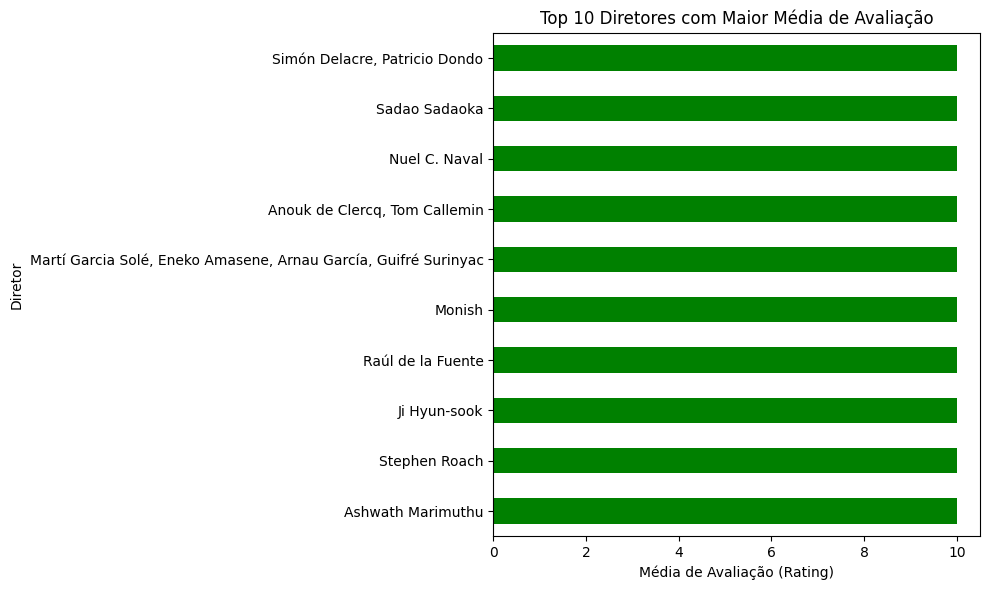

In [40]:
# Agrupar por diretor e calcular média das avaliações
top_diretores = (
    df[df['diretor'] != 'Desconhecido']
    .groupby('diretor')['media_votos']
    .mean()
    .sort_values(ascending=False)
    .head(10)  # Top 10 diretores
)

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
top_diretores.sort_values().plot(kind='barh', color='green')

plt.title('Top 10 Diretores com Maior Média de Avaliação')
plt.xlabel('Média de Avaliação (Rating)')
plt.ylabel('Diretor')
plt.tight_layout()
plt.show()